(In order to load the stylesheet of this notebook, execute the last code cell in this notebook)

# Stack Overflow

## Introduction 

In this assignment, we will look at some posts on Stack Overflow during the year of 2015 and measure the similarity of users by looking at the types of questions they answer. We will also analyze the creation dates of questions.

## Step 0. Preparation

Before we start working on the notebook, let's make sure that everything is setup properly. You should have downloaded and installed
* [Anaconda](https://store.continuum.io/cshop/anaconda/)
* [Git](http://git-scm.com/downloads)

If you are working from the undergraduate lab (on a linux machine) these are both installed, but you need to follow the instructions [from here](https://github.com/datascience16/lectures/blob/master/Lecture2/Getting-Started.ipynb).



## Step 1. Getting the data

Let's make a sample request to retrieve the questions posted on Stack Exchange on the first day of 2015. Documentation of the Stack Exchange API can be found [here](https://api.stackexchange.com/docs).

In [1]:
import requests

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00

response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
print response

<Response [200]>


All dates in the Stack Exchange API are in [unix epoch time](https://en.wikipedia.org/wiki/Unix_time). The format for the request string is specified [here](https://api.stackexchange.com/docs/questions).

We can try to print the response that Stack Exchange returns.

In [2]:
print response.text

{"items":[{"tags":["php","mysql","arrays","mysqli"],"owner":{"reputation":157,"user_id":3210431,"user_type":"registered","accept_rate":78,"profile_image":"https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1","display_name":"salep","link":"http://stackoverflow.com/users/3210431/salep"},"is_answered":true,"view_count":198,"accepted_answer_id":27727478,"answer_count":2,"score":0,"last_activity_date":1420071815,"creation_date":1420070458,"question_id":27727385,"link":"http://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array","title":"Inserting multiple records into MySQL from an array"},{"tags":["apache-pig"],"owner":{"reputation":6,"user_id":868779,"user_type":"registered","profile_image":"https://www.gravatar.com/avatar/19f7315b44e97ca1bc069694fdba7428?s=128&d=identicon&r=PG","display_name":"Balpreet Pankaj","link":"http://stackoverflow.com/users/868779/balpreet-pankaj"},"is_answered":false,"view_count":222,"answer_count":1,"score":1,"last_activity_date":

It is not possible to read the raw response. Instead, we need to decode the raw response as JSON and use the `json` library to print it.

In [3]:
import json

print json.dumps(response.json(), indent=2)


{
  "has_more": true, 
  "items": [
    {
      "is_answered": true, 
      "view_count": 198, 
      "tags": [
        "php", 
        "mysql", 
        "arrays", 
        "mysqli"
      ], 
      "last_activity_date": 1420071815, 
      "answer_count": 2, 
      "creation_date": 1420070458, 
      "score": 0, 
      "link": "http://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array", 
      "accepted_answer_id": 27727478, 
      "owner": {
        "user_id": 3210431, 
        "profile_image": "https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1", 
        "user_type": "registered", 
        "reputation": 157, 
        "link": "http://stackoverflow.com/users/3210431/salep", 
        "accept_rate": 78, 
        "display_name": "salep"
      }, 
      "title": "Inserting multiple records into MySQL from an array", 
      "question_id": 27727385
    }, 
    {
      "is_answered": false, 
      "view_count": 222, 
      "tags": [
        "apache-pig"
      

Now we can easily see that the response consists of a list of question items. For each of these items, we get information about its attributes such as its `creation_date`, `answer_count`, `owner`, `title`, etc.

Notice that has_more is true. To get more items, we can [request the next page](https://api.stackexchange.com/docs/paging).

-----------------

## Step 2. Parsing the responses

In this section, we practice some of the basic Python tools that we learned in class and the powerful string handling methods that Python offers. Our goal is to be able to pick the interesting parts of the response and transform them in a format that will be useful to us.

First let's isolate the creation_date in the response. Fill in the rest of the ```print_creation_dates_json()``` function that reads the response and prints the creation dates. Notice that a JSON object is basically a dictionary. **(5 pts)**

In [4]:
def print_creation_dates_json(response):
    """
    Prints the creation_date of all the questions in the response.
    
    Parameters:
        response: Response object
    """
    for date in response.json()["items"]:
        print date["creation_date"]

Write the code that calls the ```print_creation_dates_json()``` function to print out all the creation dates of questions posted on the first day in 2015. Please be aware of Stack Exchange's [rate limit](https://api.stackexchange.com/docs/throttle). **(5 pts)**

In [6]:
import time
page = 1
response = requests.get("https://api.stackexchange.com/2.2/questions?page=" + str(page) + "&pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
print response.__class__
print_creation_dates_json(response)
data = response.json()
while data['has_more']:
    page = page + 1
    print "requesting page:" + str(page)
    time.sleep(1)
    response = requests.get("https://api.stackexchange.com/2.2/questions?page=" + str(page) + "&pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
    data = response.json()
    print_creation_dates_json(response)
    

<class 'requests.models.Response'>
1420070458
1420070503
1420070552
1420070577
1420070611
1420070641
1420070703
1420070727
1420070734
1420070777
1420070801
1420070848
1420070859
1420070866
1420070968
1420071005
1420071029
1420071103
1420071122
1420071175
1420071184
1420071212
1420071230
1420071340
1420071431
1420071530
1420071736
1420071794
1420071830
1420071868
1420071907
1420071929
1420071939
1420072002
1420072021
1420072074
1420072129
1420072243
1420072342
1420072354
1420072397
1420072430
1420072455
1420072481
1420072610
1420072638
1420072667
1420072685
1420072777
1420072779
1420072902
1420072924
1420072976
1420072979
1420072997
1420073055
1420073169
1420073273
1420073276
1420073352
1420073383
1420073425
1420073455
1420073456
1420073492
1420073510
1420073524
1420073787
1420073851
1420073932
1420074037
1420074057
1420074085
1420074170
1420074204
1420074224
1420074226
1420074269
1420074320
1420074334
1420074356
1420074436
1420074492
1420074515
1420074596
1420074602
1420074640
14200748

Due to time constraints, we have downloaded the [data dump](http://cs-people.bu.edu/kzhao/teaching/stackoverflow-posts-2015.tar.gz) for Stack Overflow's posts in 2015. Note that this file is 10GB. If you don't have space on your computer, you can download it into `/scratch` on one of the machines in the undergrad lab or you can download it onto a USB. You may also want to work with a subset of this data at first, but your solution should be efficient enough to work with the whole dataset. For example, if you call `read()` on this file, you will get a `MemoryError`.

Write a function to parse out the questions posted in 2015. These are posts with `PostTypeId=1`. Make a `pandas DataFrame` with 3 columns: `Id`, `CreationDate`, `OwnerUserId`, and the first tag in `Tags`. Save the `DataFrame` to a file named `question_dataframe.csv` using `to_csv()`. **(10 pts)**

In [7]:
#######################################
# this function will remove question_dataframe in current dir
# and generate a new one
# it takes like 8 minutes
# the function will be called when you run this cell, so be careful when you run it
#######################################
import pandas as pd
import numpy as np
from pandas import DataFrame
import os
import lxml.etree as ET
import csv
import time


def getData():
    startTime = time.localtime()
    #open file
    os.system("rm question_dataframe.csv")
    os.system("touch question_dataframe.csv")
    question_df = open('question_dataframe.csv', 'r+b')
    #create header
    columns = ['Id', 'CreationDate', 'OwnerUserId', 'Tag']

    writerFile = csv.writer(question_df, delimiter=',')
    writerFile.writerow(columns)

    data = ET.iterparse('stackoverflow-posts-2015.xml', tag="row")
    for event, row in data:
        #when the post is a question, process
        if (row.get('PostTypeId')=='1'):
            #get first tag only
            tags = row.get('Tags').split(">", 1)
            tags[0]=tags[0]+'>'
            #adding rows to the DataFrame file (if no OwnerUserId exists  then say 'No OwnerUserID' instead)
            if (row.get('OwnerUserId')):
                writerFile.writerow([row.get('Id'), row.get('CreationDate'), row.get('OwnerUserId'), tags[0]] )              
            else:
                writerFile.writerow([row.get('Id'), row.get('CreationDate'), 'No OwnerUserID', tags[0]])
        row.clear()
    question_df.close()
    endTime = time.localtime()
    print startTime
    print endTime
    print "loop done"

getData()

time.struct_time(tm_year=2016, tm_mon=2, tm_mday=10, tm_hour=21, tm_min=0, tm_sec=6, tm_wday=2, tm_yday=41, tm_isdst=0)
time.struct_time(tm_year=2016, tm_mon=2, tm_mday=10, tm_hour=21, tm_min=6, tm_sec=44, tm_wday=2, tm_yday=41, tm_isdst=0)
loop done


In [8]:
import pandas

question_df = pandas.read_csv('question_dataframe.csv')
print question_df

               Id             CreationDate     OwnerUserId               Tag
0        27727385  2015-01-01T00:00:58.253         3210431             <php>
1        27727388  2015-01-01T00:01:43.673          868779      <apache-pig>
2        27727391  2015-01-01T00:02:32.123         4372672             <ios>
3        27727393  2015-01-01T00:02:57.983         2482149      <sql-server>
4        27727394  2015-01-01T00:03:31.337         4263870             <php>
5        27727396  2015-01-01T00:04:01.407         4409381         <android>
6        27727406  2015-01-01T00:05:03.773          875317              <c#>
7        27727407  2015-01-01T00:05:27.167          821742            <java>
8        27727408  2015-01-01T00:05:34.733         2595033              <c#>
9        27727409  2015-01-01T00:06:17.720         1815395          <apache>
10       27727410  2015-01-01T00:06:41.067          541091           <mysql>
11       27727414  2015-01-01T00:07:28.747         1210038      <javascript>

-----------------

## Step 3. Putting it all together

We are now ready to tackle our original problem. Write a function to measure the similarity of the top 1000 users with the most answer posts. Compare the users based on the types of questions they answer. We will categorize the questions by looking at the first tag in each question. You may choose to implement any one of the similarity/distance measures we discussed in class. Document your findings. **(30pts)**

Note that answers are posts with `PostTypeId=2`. The ID of the question in answer posts is the `ParentId`.

You may find the [sklearn.feature_extraction module](http://scikit-learn.org/stable/modules/feature_extraction.html) helpful.

In [9]:
#get answer_dataframe
#######################################
# this function will also remove answer_dataframe in current dir
# and generate a new one
# it takes also like 8 minutes
# the function will also be called when you run this cell, so still, be careful when you run it
#######################################
import pandas as pd
import numpy as np
from pandas import DataFrame
import os
import lxml.etree as ET
import csv
import time


def getAnsData():
    startTime = time.localtime()
    #open file
    os.system("rm answer_dataframe.csv")
    os.system("touch answer_dataframe.csv")
    answer_df = open('answer_dataframe.csv', 'r+b')
    #create header
    columns = ['Id','ParentId','OwnerUserId']

    writerFile = csv.writer(answer_df, delimiter=',')
    writerFile.writerow(columns)

    data = ET.iterparse('stackoverflow-posts-2015.xml', tag="row")
    for event, row in data:
        #when the post is a question, process
        if (row.get('PostTypeId')=='2'):
            if (row.get('OwnerUserId')):
                writerFile.writerow([row.get('Id'), row.get('ParentId'), row.get('OwnerUserId')] )              
            else:
                writerFile.writerow([row.get('Id'), row.get('ParentId'), 'No OwnerUserID'])
        row.clear()
    answer_df.close()
    endTime = time.localtime()
    print startTime
    print endTime
    print "loop done"

getAnsData()

time.struct_time(tm_year=2016, tm_mon=2, tm_mday=10, tm_hour=21, tm_min=7, tm_sec=6, tm_wday=2, tm_yday=41, tm_isdst=0)
time.struct_time(tm_year=2016, tm_mon=2, tm_mday=10, tm_hour=21, tm_min=14, tm_sec=18, tm_wday=2, tm_yday=41, tm_isdst=0)
loop done


In [10]:
#read dataframes as preperation
answerDataFrame = 'answer_dataframe.csv'
questionDataFrame = 'question_dataframe.csv'
answer_df = pd.read_csv(answerDataFrame)
question_df = pd.read_csv(questionDataFrame)

In [11]:
#get the top 1k users and their parent posts
######################################################
# this cell will find the 1000 users with most answers
# then search the answer df to get parent post id
# the two return value for this function are:
#     top1kID: a np array stores the user id for that 1000 users
#     theirPosts: a dict where key is userid and value is a list of ParentPostId
######################################################
import numpy as np
import pandas as pd
from pandas import DataFrame
import os
import xml.etree.ElementTree as ET
import time

def getTop1k():
    df = answer_df
    #get top 1k users
    top1kOUI = df.OwnerUserId.value_counts()[:1000]
    #the post dict they answered
    theirPosts = {}
    for ID in top1kOUI.keys():
        theirPosts[ID] = np.array([])
    #put parent ID under their name
    for line in df.values:
        if line[2] in top1kOUI.keys():
            theirPosts[line[2]] = np.append(theirPosts[line[2]] , line[1])
    returnArray = np.array(top1kOUI.keys())
    return returnArray, theirPosts

top1kID, top1kUserPosts = getTop1k()
#now we got the user id for top 1k users and the posts they ever answered in a dict

In [38]:
#return a dict where key is top 1000 user id and value is all the post tags they answered
######################################################
# this function will check the question and 
# find all the posts the user answered.
# Then get them into a list, remove the duplicate.
# finally we got a dict where key is userid and 
# according to the output, it takes 30sec to deal with 100 users
# so it's like 5 mins
######################################################
def getTagDict(top1kID , top1kUserPosts):
    t1 = time.time()
    userTagDict = {}
    top1kID.sort()
    top1kID = np.delete(top1kID , [top1kID.searchsorted('No OwnerUserId')])
    i = 0
    for topUser in top1kID:
        userTagDict[topUser] = np.array([])
    print "start loop"
    for topUser in top1kID:
        startTime = time.time()
        tag = (question_df.Tag[question_df.Id.isin(top1kUserPosts[top1kID[i]])]).values
        userTagDict[topUser] = np.append(userTagDict[topUser] , tag)
        userTagDict[topUser] = np.unique(userTagDict[topUser])
        i = i + 1
        print i
        if i % 100 == 0:
            t2 = time.time()
            print str(i) + ' finished in ' + str(t2 - t1)
            t1 = t2
    return userTagDict
userTagDict = getTagDict(top1kID , top1kUserPosts)

start loop
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
100 finished in 35.2409000397
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
200 finished in 29.2136170864
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
2

In [40]:
#check jaccard similarity between these 1000 users
# takes about 2mins to run
import seaborn as sns
import matplotlib.pyplot as plt
i = 0
j = 0
jacc_dist = np.zeros((len(top1kID), len(top1kID)) , dtype = 'float')
startTime = time.localtime()
for ID1 in top1kID:
    for ID2 in top1kID:
        nom = float(len(np.intersect1d(userTagDict[ID1] , userTagDict[ID2])))
        denom = float(len(np.union1d(userTagDict[ID1] , userTagDict[ID2])))
        jacc_dist[i][j] = float(nom / denom)
        j = j + 1
    i = i + 1
    j = 0
endTime = time.localtime()
print startTime
print endTime

time.struct_time(tm_year=2016, tm_mon=2, tm_mday=10, tm_hour=21, tm_min=53, tm_sec=59, tm_wday=2, tm_yday=41, tm_isdst=0)
time.struct_time(tm_year=2016, tm_mon=2, tm_mday=10, tm_hour=21, tm_min=55, tm_sec=52, tm_wday=2, tm_yday=41, tm_isdst=0)


In [41]:
#save the result to csv file
# if "Document your finding" means this...I guess?
np.savetxt("top1k_jaccard_dist.csv", jacc_dist , fmt='%.3f', delimiter=",")

In [42]:
#get rid of self compare, which is all 1 in the diagonal
for i in range(1000):
    jacc_dist[i][i] = 0.0

In [43]:
#find most similar 100 pair in jacc_dist
sorted_jacc_dist = jacc_dist
idx_1d = sorted_jacc_dist.flatten().argsort()[-100:]
# convert the idx_1d back nto indices arrays for each dimension
x_idx, y_idx = np.unravel_index(idx_1d, sorted_jacc_dist.shape)

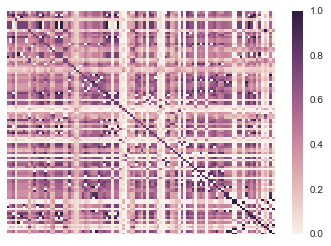

In [44]:
#plot 100 most similar users
import sklearn.metrics as metrics
%matplotlib inline
sorted_jacc_dist = jacc_dist[x_idx,:][:,y_idx]
#plot
sns.heatmap(sorted_jacc_dist, xticklabels=False, yticklabels=False, linewidths=0 )

Plot the top 100 most similar users. See [Lecture 3](https://github.com/datascience16/lectures/blob/master/Lecture3/Distance-Functions.ipynb) for examples. **(10 pts)**

Next, let's create some time series from the data. Look at the top 100 users with the most question posts. For each user, your time series will be the `CreationDate` of the questions posted by that user. You may want to make multiple time series for each user based on the first tag of the questions. Compare the time series using one of the methods discussed in class. Document your findings. **(30 pts)**

You may find the [pandas.DataFrame.resample module](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) helpful.

In [18]:
#####################################################################
# calculate the post amount based on every month for every user
# calculate the Euclidean distance for every pair
# find two pairs with biggest dist and two pairs with smallest dist
# plot these 4 pair of users
#####################################################################

In [21]:
#read df
question_df = pandas.read_csv('question_dataframe.csv')
# question_df = question_df[question_df.OwnerUserId != 'No OwnerUserId']

In [23]:
######################################################
# get a time series for every user, 
# x axis is creation date
# y axis is the amout of posts
# resampled the series in month
######################################################
import pandas
import numpy as np

#used for resample
def _sum(x):
    if len(x) == 0:
        return 0
    else:
        return np.sum(x)
    
top100Users = question_df.OwnerUserId.value_counts()[1:101]
topUsersLst = np.array(top100Users.keys())
topUsersTimes = {}
    
#add start and end index for 2015
tempData = np.array([0 , 0])
tempIndex = np.array(['2015-01-01T00:00:00.000' , '2015-12-31T23:59:59.999'])
headerDate = pandas.Series(
    data = tempData,
    index = pandas.to_datetime(tempIndex)
)

#get the CreationDate of all posts answered by this user
for i in range(100):
    topUsersTimes[topUsersLst[i]] = question_df.loc[question_df['OwnerUserId'] == topUsersLst[i], 'CreationDate']
    temp = topUsersTimes[topUsersLst[i]].value_counts()
    topUsersTimes[topUsersLst[i]] = pandas.Series(
        data = temp.values, 
        index = pandas.to_datetime(temp.keys())
    )
    topUsersTimes[topUsersLst[i]] = topUsersTimes[topUsersLst[i]].append(headerDate)
    topUsersTimes[topUsersLst[i]] = topUsersTimes[topUsersLst[i]].sort_index()
    topUsersTimes[topUsersLst[i]] = topUsersTimes[topUsersLst[i]].resample('1M' , how = _sum , label = 'left')

In [24]:
def my_euclidean_dist(x,y):
    return float(np.sqrt(np.sum(np.square(x-y))))

In [25]:
# calculate the euc distance in upper triangle 
euc_dist = np.zeros((100, 100) , dtype = 'float')
for i in range(100):
    for j in range(i , 100):
        euc_dist[i][j] = my_euclidean_dist(
            topUsersTimes[topUsersLst[i]].values.astype('float') ,
            topUsersTimes[topUsersLst[j]].values.astype('float')
        )
print euc_dist

[[   0.           69.34695379   68.81133628 ...,  100.54352291
    98.07140256  105.33280591]
 [   0.            0.           58.83876273 ...,   79.82480817
    81.09870529   80.73413157]
 [   0.            0.            0.         ...,   71.54019849
    89.13472948   84.36824047]
 ..., 
 [   0.            0.            0.         ...,    0.           51.79768335
    40.1248053 ]
 [   0.            0.            0.         ...,    0.            0.
    41.74925149]
 [   0.            0.            0.         ...,    0.            0.            0.        ]]


In [ ]:
# is this really what "Document your finding" means?
np.savetxt("top100_euc_dist.csv", euc_dist , fmt='%.2f', delimiter=",")

Plot the 2 most similar and the 2 most different time series. **(10 pts)**

In [26]:
#get smallest and biggest in euc_dist
sorted_euc_dist = euc_dist
idx_1d_big = sorted_euc_dist.flatten().argsort()[-2:]
idx_1d_small = sorted_euc_dist.flatten().argsort()[:]
# convert the idx_1d back nto indices arrays for each dimension
x_idx_big, y_idx_big = np.unravel_index(idx_1d_big, sorted_euc_dist.shape)
x_idx_small, y_idx_small = np.unravel_index(idx_1d_small, sorted_euc_dist.shape)

big_coord = zip(x_idx_big , y_idx_big)
small_coord = zip(x_idx_small , y_idx_small)

for x , y in small_coord:
    if euc_dist[x][y] == 0:
        small_coord.remove((x , y))
small_coord = small_coord[:2]

print big_coord
print "=================="
print small_coord

[(0, 93), (0, 74)]
[(67, 14), (67, 12)]


In [27]:
import matplotlib.pyplot as plt

series = topUsersTimes[topUsersLst[0]]
series2 = topUsersTimes[topUsersLst[99]]

def plotUser(series , series2):
#     series = series.resample('1M' , how = _sum , label = 'left')
#     series2 = series2.resample('1M' , how = _sum, label = 'left')
    plt.figure(figsize=(20,10))
    plt.plot(series)
    plt.plot(series2)
    plt.xlabel('Date')
    plt.xlim('Jan 2015' , 'Dec 2015')
    plt.ylabel('Posts')
    # print series2.resample('1M' , how = 'sum' , fill_method = 'pad')


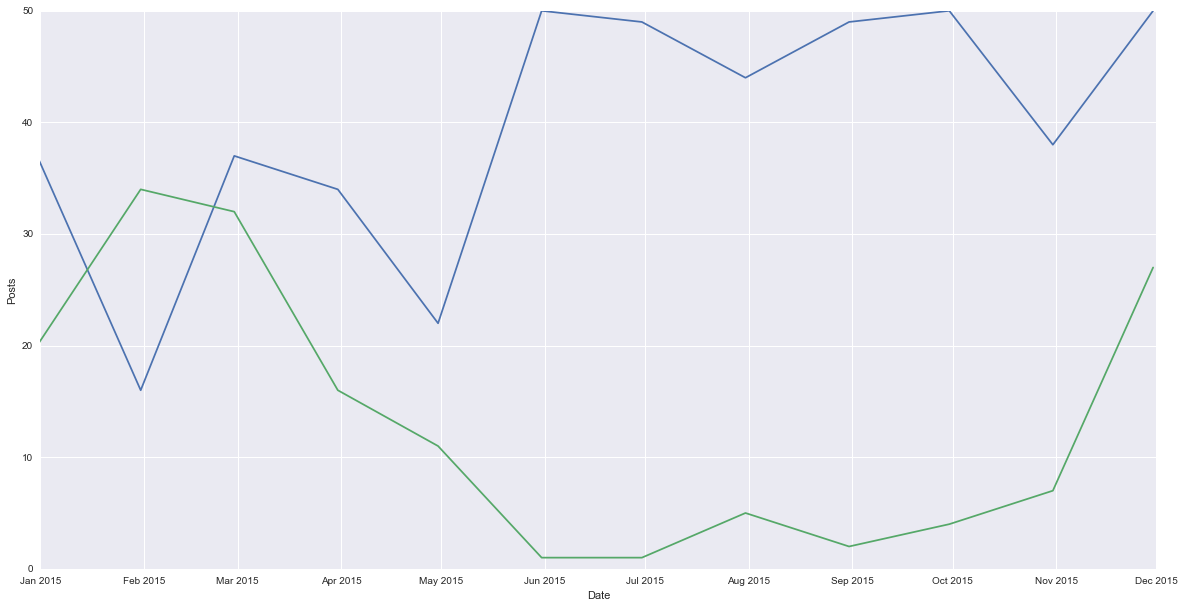

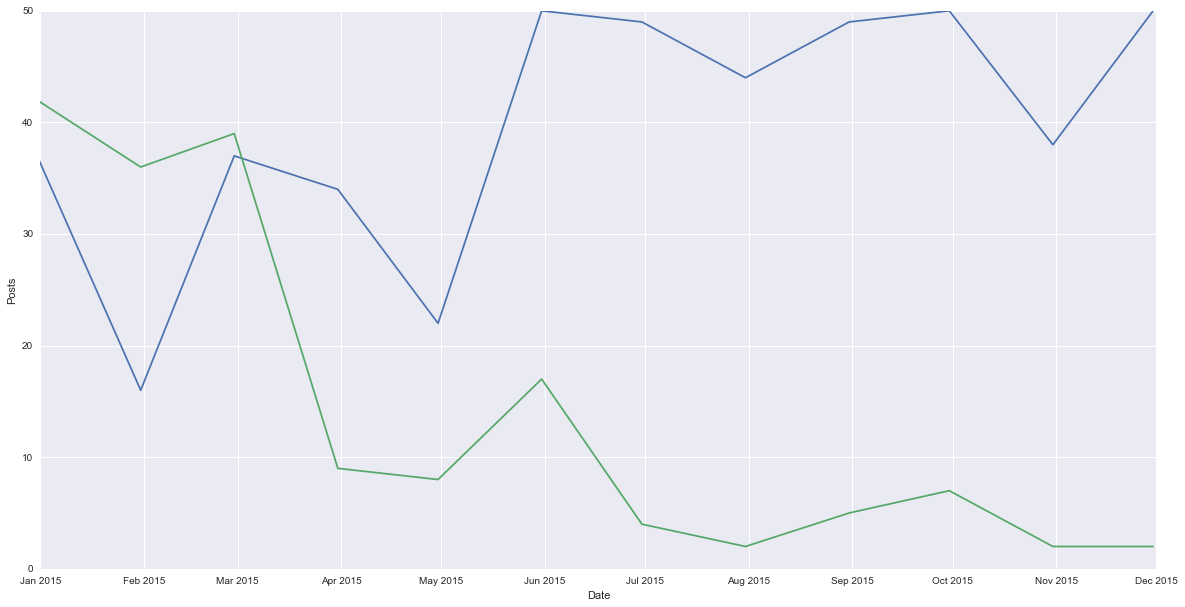

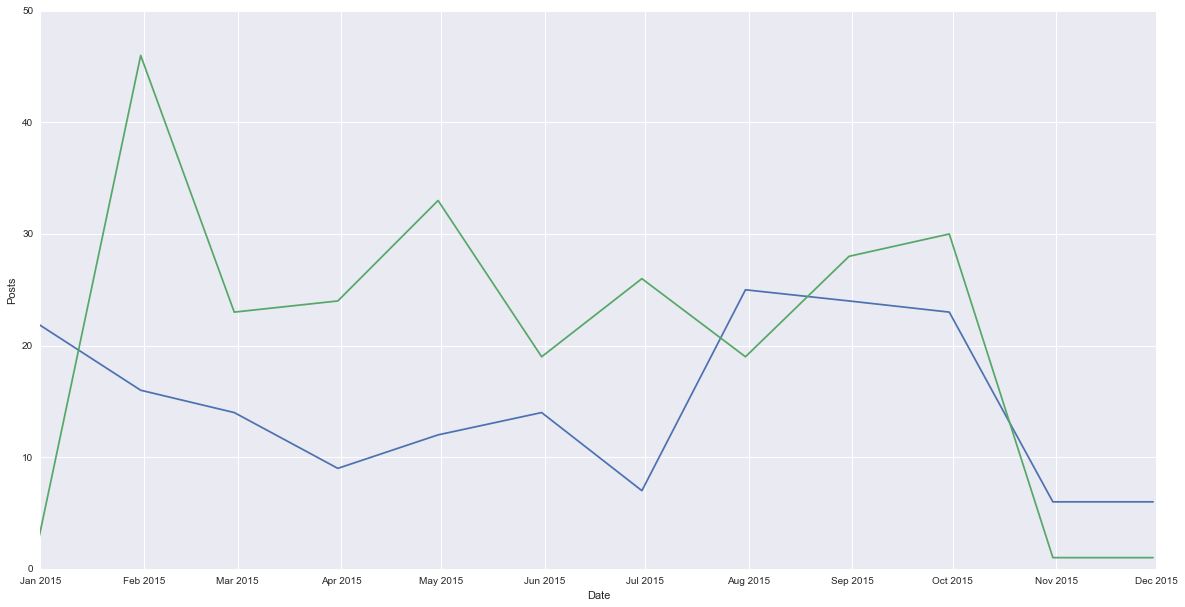

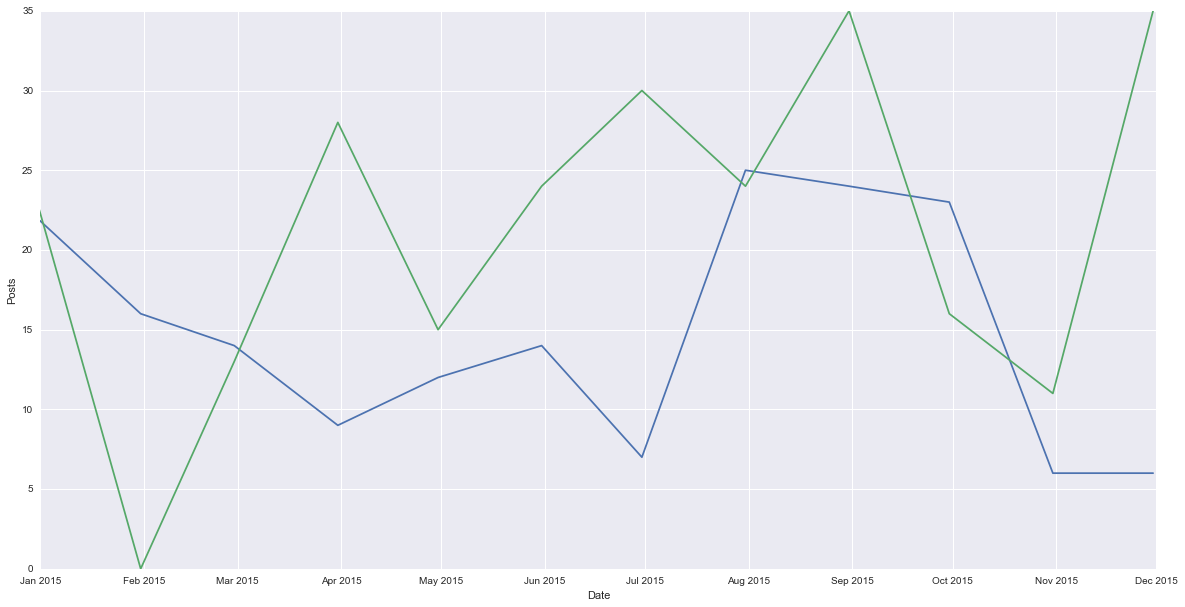

In [28]:
for x , y in big_coord:
    plotUser(topUsersTimes[topUsersLst[x]] , topUsersTimes[topUsersLst[y]])
for x , y in small_coord:
    plotUser(topUsersTimes[topUsersLst[x]] , topUsersTimes[topUsersLst[y]])

In [ ]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()